In [192]:
import numpy as np
import pandas as pd
from datetime import datetime
from functools import reduce
import operator 
import matplotlib.pyplot as plt
%matplotlib inline

In [193]:
# load json twitter data
data= pd.read_json('../data/lausanne_50K.json',typ='frame',lines=True)
data.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,quoted_status,quoted_status_id,quoted_status_id_str,retweet_count,retweeted,source,text,timestamp_ms,truncated,user
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'urls': [], 'trends': [], 'has...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Flemme de me préparer,2015-07-29 20:09:32.554,False,{'profile_banner_url': 'https://pbs.twimg.com/...
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'symbols': [], 'urls': [], 'trends': [], 'has...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Trop hâte d'aller à Zurich,2015-07-30 00:38:35.304,False,"{'id': 569876210, 'profile_banner_url': 'https..."
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'urls': [], 'trends': [], 'has...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://twitter.com/download/iphone"" r...",mais accidentellement il ajouta a cette mixtur...,2015-07-30 00:42:51.603,False,"{'id': 569876210, 'profile_banner_url': 'https..."
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'symbols': [], 'urls': [], 'trends': [], 'has...",NaN,NaN,0,False,...,NaN,NaN,NaN,0,False,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@sansplomb99 lui a payé en effet 😁,2015-07-31 19:19:53.202,False,"{'id': 716221184, 'profile_banner_url': 'https..."
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'urls': [{'indices': [112, 135...",NaN,NaN,0,False,...,"{'favorite_count': 0, 'user': {'profile_banner...",{'$numberLong': '627406966093164544'},6.274070e+17,0,False,"<a href=""http://twitter.com/download/iphone"" r...",Holaaa Argentinaa!! Ya terminó la clase y estu...,2015-08-01 10:16:45.789,False,{'profile_banner_url': 'https://pbs.twimg.com/...


In [194]:
data['created_at']= pd.to_datetime(data['created_at'])

In [195]:
data['tweet_id']=data['_id'].map(lambda x: x['$oid'])
data['hashtags']=data['entities'].map(lambda x: x['hashtags'])
data['hashtags']= data['hashtags'].map(lambda x: [xi['text'].lower() for xi in x] if x != [] else np.nan)
data['user_id']=data['user'].map(lambda x: x['id'])
data['user_location']=data['user'].map(lambda x: x['location'])


data.head()

,_id,contributors,coordinates,created_at,display_text_range,entities,extended_entities,extended_tweet,favorite_count,favorited,...,retweeted,source,text,timestamp_ms,truncated,user,tweet_id,hashtags,user_id,user_location
0,{'$oid': '55b932fd0a1776527f627ec2'},NaN,None,2015-07-29 20:09:32,NaN,"{'symbols': [], 'urls': [], 'trends': [], 'has...",NaN,NaN,0,False,...,False,"<a href=""http://twitter.com/download/iphone"" r...",Flemme de me préparer,2015-07-29 20:09:32.554,False,{'profile_banner_url': 'https://pbs.twimg.com/...,55b932fd0a1776527f627ec2,NaN,586804968,"Brooklyn, NYC"
1,{'$oid': '55b9720c0a1776527f628c28'},NaN,None,2015-07-30 00:38:35,NaN,"{'symbols': [], 'urls': [], 'trends': [], 'has...",NaN,NaN,0,False,...,False,"<a href=""http://twitter.com/download/iphone"" r...",Trop hâte d'aller à Zurich,2015-07-30 00:38:35.304,False,"{'id': 569876210, 'profile_banner_url': 'https...",55b9720c0a1776527f628c28,NaN,569876210,titrite
2,{'$oid': '55b9730c0a1776527f628c3b'},NaN,None,2015-07-30 00:42:51,NaN,"{'symbols': [], 'urls': [], 'trends': [], 'has...",NaN,NaN,0,False,...,False,"<a href=""http://twitter.com/download/iphone"" r...",mais accidentellement il ajouta a cette mixtur...,2015-07-30 00:42:51.603,False,"{'id': 569876210, 'profile_banner_url': 'https...",55b9730c0a1776527f628c3b,NaN,569876210,titrite
3,{'$oid': '55bbca590a1776527f62dacc'},NaN,None,2015-07-31 19:19:53,NaN,"{'symbols': [], 'urls': [], 'trends': [], 'has...",NaN,NaN,0,False,...,False,"<a href=""http://tapbots.com/tweetbot"" rel=""nof...",@sansplomb99 lui a payé en effet 😁,2015-07-31 19:19:53.202,False,"{'id': 716221184, 'profile_banner_url': 'https...",55bbca590a1776527f62dacc,NaN,716221184,Genève - Paris - London
4,{'$oid': '55bc9c8e0a1776527f62ee4a'},NaN,None,2015-08-01 10:16:45,NaN,"{'symbols': [], 'urls': [{'indices': [112, 135...",NaN,NaN,0,False,...,False,"<a href=""http://twitter.com/download/iphone"" r...",Holaaa Argentinaa!! Ya terminó la clase y estu...,2015-08-01 10:16:45.789,False,{'profile_banner_url': 'https://pbs.twimg.com/...,55bc9c8e0a1776527f62ee4a,NaN,34885337,Venezuela - Switzerland


## Basic statistics

In [10]:
data.describe()

,contributors,favorite_count,id_str,in_reply_to_status_id_str,in_reply_to_user_id_str,is_quote_status,possibly_sensitive,quoted_status_id_str,retweet_count
count,0.0,50000.0,5.000000e+04,1.634000e+04,1.927100e+04,49958.000000,20941.000000,3.810000e+03,50000.0
mean,NaN,0.0,7.649092e+17,7.656941e+17,4.957148e+16,0.076364,0.009598,7.596949e+17,0.0
std,NaN,0.0,2.930100e+16,3.429869e+16,1.852219e+17,0.265583,0.097502,3.529139e+16,0.0
min,NaN,0.0,6.264847e+17,2.401283e+10,8.412000e+03,0.000000,0.000000,3.194941e+17,0.0
25%,NaN,0.0,7.374537e+17,7.375975e+17,1.547980e+08,0.000000,0.000000,7.367500e+17,0.0
50%,NaN,0.0,7.673406e+17,7.715668e+17,5.573253e+08,0.000000,0.000000,7.576861e+17,0.0
75%,NaN,0.0,7.888412e+17,7.921157e+17,2.483374e+09,0.000000,0.000000,7.847596e+17,0.0
max,NaN,0.0,8.145965e+17,8.145963e+17,8.135226e+17,1.000000,1.000000,8.145638e+17,0.0


## Temporal statistics

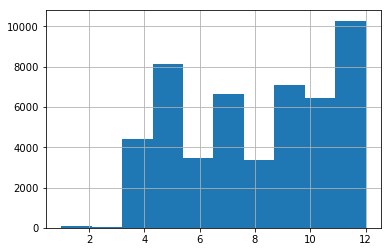

In [14]:
up_time= pd.DataFrame(columns=['year', 'month','date'])
up_time['date']=data['created_at']

up_months = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.month)
up_time['month']=up_months

up_year = pd.to_datetime(data['created_at'],format='%y-%M-%d %H:%M %p').apply(lambda x: x.year)
up_time['year']=up_year

up_months.hist()

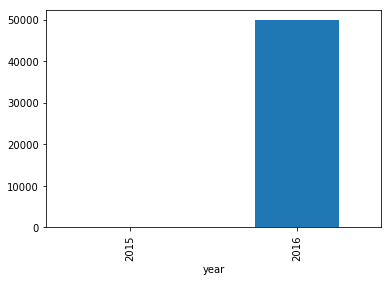

In [15]:
up_time.groupby('year')['date'].count().plot.bar()

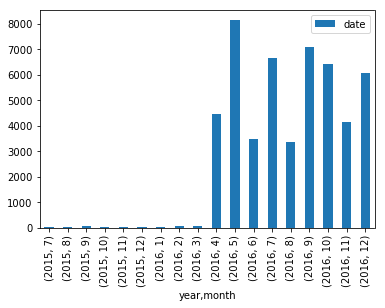

In [16]:
up_time.groupby(['year','month']).count().plot.bar()

## Number of characters

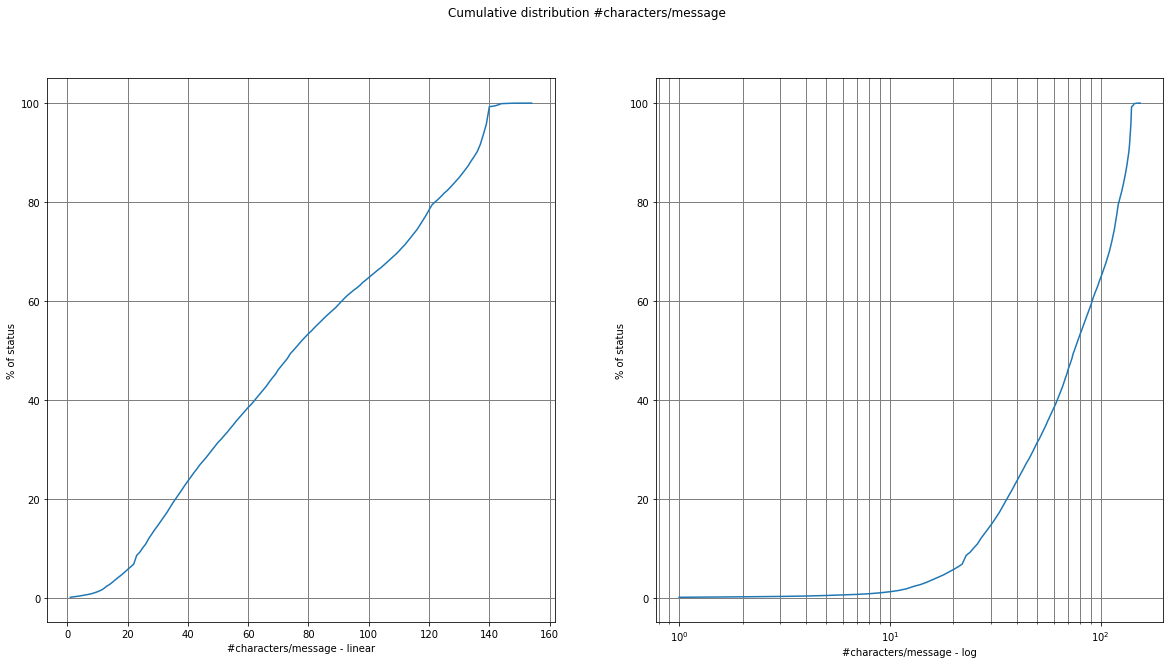

In [18]:
nb_characters = pd.DataFrame(data['text'].apply(lambda x : len(x)))

f, (ax1, ax2) = plt.subplots(1, 2, figsize=(20,10))
f.suptitle('Cumulative distribution #characters/message')

ax1.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax1.set_xlabel('#characters/message - linear')
ax1.set_ylabel('% of status')
ax1.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

ax2.plot(nb_characters.sort_values(by='text').reset_index().groupby('text').count().cumsum()*100/nb_characters.size)
ax2.set_xscale('log')
ax2.set_xlabel('#characters/message - log')
ax2.set_ylabel('% of status')
ax2.grid(color='grey', linestyle='-', linewidth=1, axis='both', which='both')

## Hashtags associated with \#lausanne
Filter by #lausanne  and Compute the hashtags associated with \#lausanne

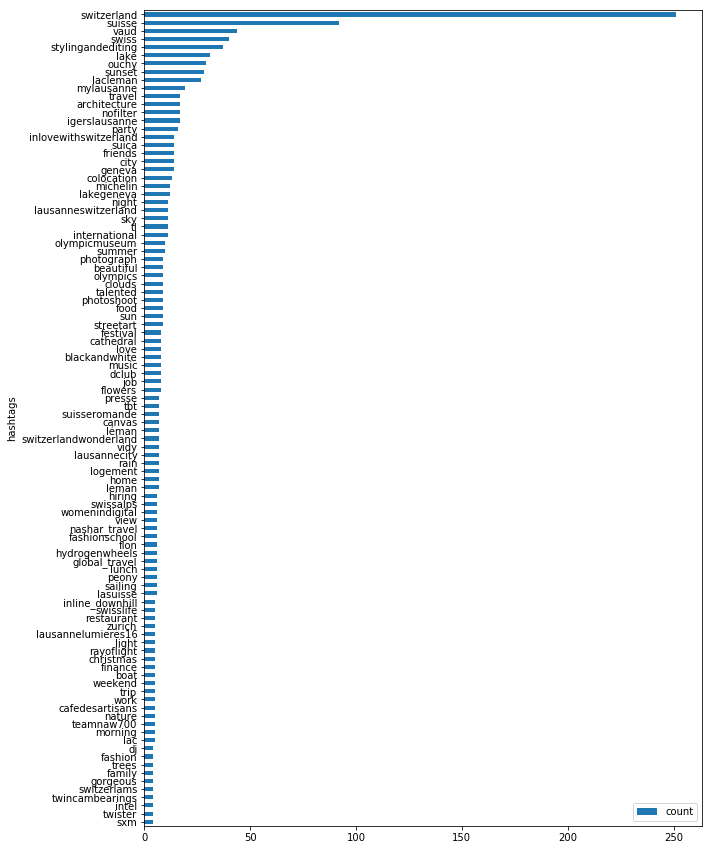

In [208]:
#Return 100 hashtags most associated with main_hashtags in the dataset df  with the count of  each hashtags
# also
def ComputeAssociatedHashtags(data, main_hashtag):  
    #exclude tweet without hashtags
    nan_hashtags=data[~data['hashtags'].isnull()]
    #keep tweets with hashtag lausanne
    lausanne_hashtags=nan_hashtags[ [main_hashtag in x for x in list(nan_hashtags['hashtags'])] ]
    associated_hashtags= list(lausanne_hashtags['hashtags'])
    associated_hashtags= reduce(operator.add, associated_hashtags)
    associated_hashtags= [x for x in associated_hashtags if x!= main_hashtag]
    associated_hashtags= pd.concat([pd.DataFrame(associated_hashtags)])
    associated_hashtags['count']= pd.DataFrame(list(np.ones(len(associated_hashtags))))
    associated_hashtags = associated_hashtags.rename(columns={0:'hashtags'})
    associated_hashtags = associated_hashtags.groupby(by='hashtags').count().sort_values(by= 'count', ascending= True).tail(100)
    associated_hashtags.plot(kind='barh', figsize=(10,15))

    return associated_hashtags.iloc[::-1]

associated_lausanne= ComputeAssociatedHashtags(data, 'lausanne')

# Coordinates 

why is there some data without coordinates when it's tweet geolocalized in Lausanne ?

In [211]:
print(data.shape)
unlocalized_data= data[data['coordinates'].isnull()]
print(unlocalized_data.shape)

(50000, 37)
(43375, 37)


In [189]:
import folium

#create and display map (centered on Lausanne) of tweets
#df : tweets dataset, with
#popup_col: column values to show on popup, color_hx: hexadecimal color code for the tweet markers
#function already filter tweets to plot those with coordinates
def tweetMap(df,popup_col,color_hx):
    localized_data= df[~df['coordinates'].isnull()]
    localized_data['coordinates']= localized_data['coordinates'].map(lambda x: x['coordinates'])
    map_lausanne = folium.Map(location=[46.533340, 6.623380], zoom_start=12)
    localized_data.apply(lambda x: folium.CircleMarker([x['coordinates'][1],x['coordinates'][0]],radius=5,color=color_hx, fill_color=color_hx, fill=True, fill_opacity=0.7, popup=folium.Popup(x[popup_col], parse_html=True)).add_to(map_lausanne), axis =1 )
    return map_lausanne
    
map_lausanne = tweetMap(data[1:2000], 'text','#ff0000')
map_lausanne

/Users/valentine/anaconda/envs/deep/lib/python3.5/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


# Sentiment analysis